In [43]:
import pandas as pd
import numpy as np
from scipy.integrate import cumtrapz
from scipy.signal import detrend
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks


Se define variables que representen la ruta de acceso

In [44]:
"""MUESTREOS"""
#640 Hz
w640=r"c:\Users\chelo\Downloads\Vibras-Mec-nicas-main\Vibras-Mec-nicas-main\LAB 02\Mediciones limpias\Parte 1\Test(2024-10-10,16-00-54)\640.csv"
#1280 hz
w1280=r"C:\Users\chelo\Downloads\Vibras-Mec-nicas-main\Vibras-Mec-nicas-main\LAB 02\Mediciones limpias\Parte 1\Test(2024-10-10,16-00-10)\1280.csv"
#2560 hz
w2560=r"C:\Users\chelo\Downloads\Vibras-Mec-nicas-main\Vibras-Mec-nicas-main\LAB 02\Mediciones limpias\Parte 1\Test(2024-10-10,15-59-33)\2560.csv"
#5120 hz 
w5120= r"C:\Users\chelo\Downloads\Vibras-Mec-nicas-main\Vibras-Mec-nicas-main\LAB 02\Mediciones limpias\Parte 1\Test(2024-10-10,15-59-02)\5120.csv"
#10240hz
w10240=r"C:\Users\chelo\Downloads\Vibras-Mec-nicas-main\Vibras-Mec-nicas-main\LAB 02\Mediciones limpias\Parte 1\Test(2024-10-10,15-58-18)\10240.csv"

Se define la función que integra la señal dada por el acelerómetro para así calcular la posición

In [45]:

def integrar(path, time1, muestreo):
    output_filename=rf"C:\Users\chelo\Documents\Vibras laboratorio 2\NF\Pos vs tiempo {muestreo} Hz (de muestreo).csv"

    # Cargar los datos desde el archivo CSV
    data = pd.read_csv(path, sep="\t", names=["tiempo", "aceleracion"])
    # Filtrar datos hasta el tiempo especificado
    data = data[data["tiempo"] <= time1]

    # Convertir aceleración de g a m/s²
    data["aceleracion"] *= 9.81
    
    # Graficar la aceleración para verificar su forma
    plt.figure()
    plt.plot(data["tiempo"], data["aceleracion"], label="Aceleración (m/s²)")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Aceleración (m/s²)")
    #plt.title("Aceleración en función del tiempo")
    plt.legend()
    plt.show()

    # Integrar la aceleración para obtener la velocidad
    velocidad = cumtrapz(data["aceleracion"], data["tiempo"], initial=0)

    # Integrar la velocidad para obtener la posición
    posicion = cumtrapz(velocidad, data["tiempo"], initial=0)
    posicion = detrend(posicion)

    # Ajustar el tamaño del DataFrame para que coincida con las longitudes de 'velocidad' y 'posicion'
    data = data.iloc[:len(velocidad)]

    # Agregar las columnas de velocidad y posición al DataFrame
    data["velocidad"] = velocidad
    data["posicion"] = posicion

    # Crear una nueva columna con "tiempo" y "posicion" combinados, separados por un espacio
    data["tiempo_posicion"] = data["tiempo"].astype(str) + " " + data["posicion"].astype(str)

    # Guardar solo la columna combinada en el archivo CSV especificado
    data[["tiempo_posicion"]].to_csv(output_filename, index=False, header=False)

    # Graficar posición vs tiempo
    plt.figure()
    plt.plot(data["tiempo"], data["posicion"], label="Posición (m)")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Posición (m)")
    #plt.title("Posición vs. Tiempo")
    plt.legend()
    plt.show()

    return data["posicion"]



Demostración de funcionamiento de la función

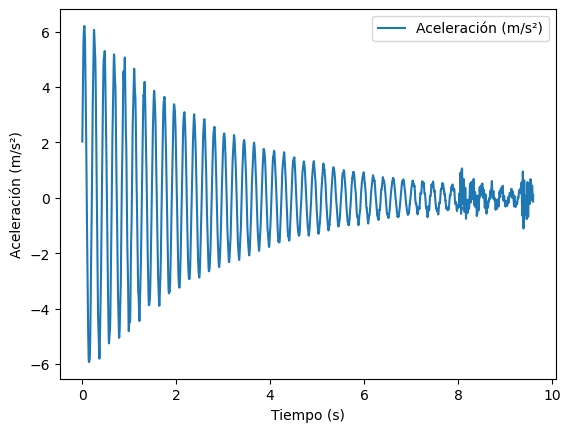

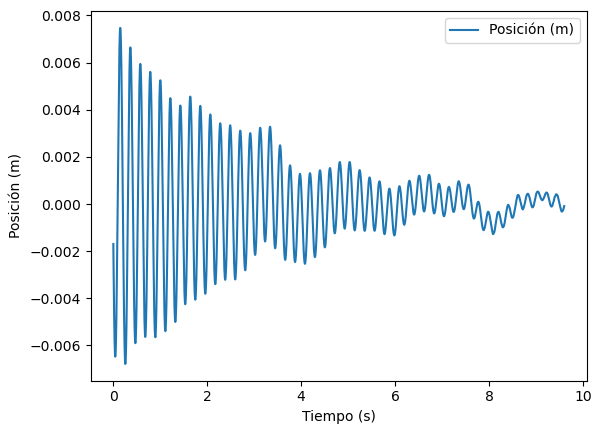

0      -0.001697
1      -0.002007
2      -0.002312
3      -0.002611
4      -0.002902
          ...   
6139   -0.000133
6140   -0.000122
6141   -0.000111
6142   -0.000100
6143   -0.000089
Name: posicion, Length: 6144, dtype: float64

In [46]:
""""Calcula posición para la señal a una frecuencia de muestreo de 640 Hz """""
integrar(w640,10,640)

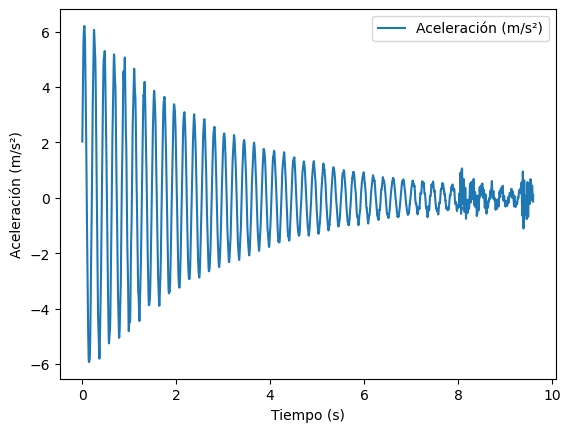

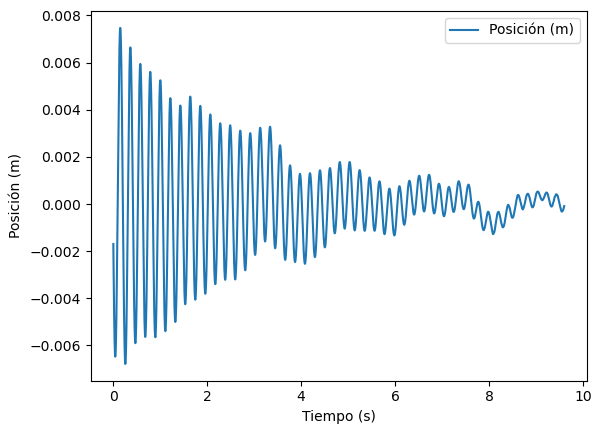

0      -0.001697
1      -0.002007
2      -0.002312
3      -0.002611
4      -0.002902
          ...   
6139   -0.000133
6140   -0.000122
6141   -0.000111
6142   -0.000100
6143   -0.000089
Name: posicion, Length: 6144, dtype: float64

In [47]:
integrar(w640,10,6401)

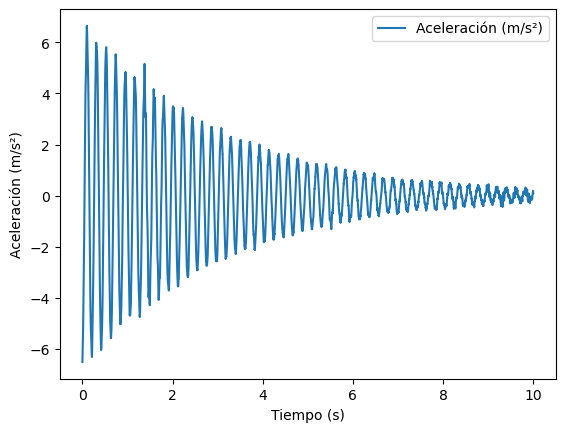

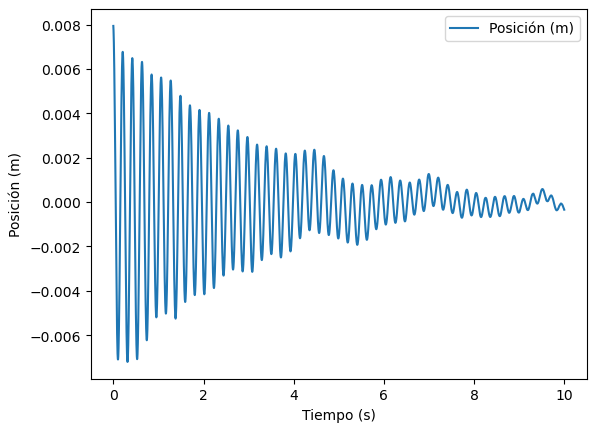

0        0.007936
1        0.007913
2        0.007886
3        0.007855
4        0.007820
           ...   
12796   -0.000331
12797   -0.000334
12798   -0.000338
12799   -0.000341
12800   -0.000344
Name: posicion, Length: 12801, dtype: float64

In [48]:
integrar(w1280, 10, 1280)

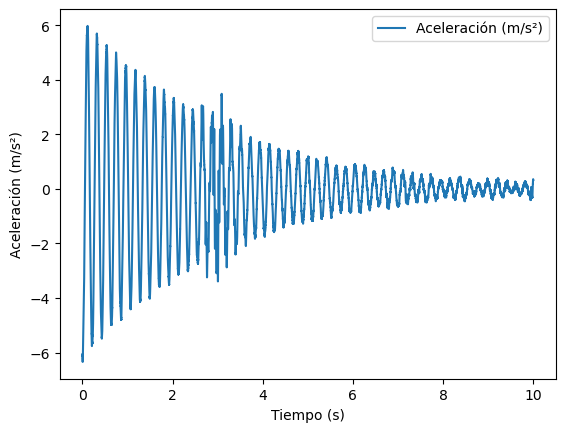

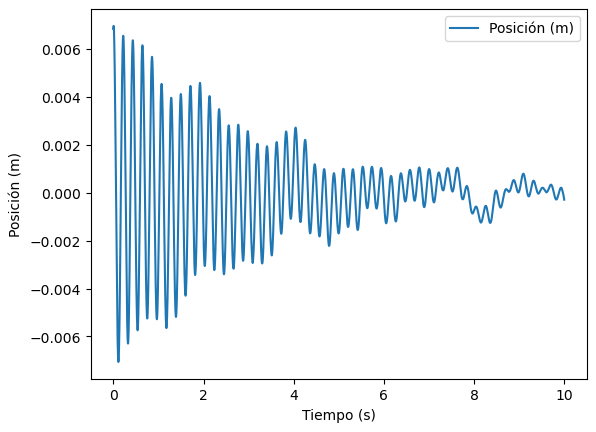

0        0.006839
1        0.006853
2        0.006867
3        0.006880
4        0.006892
           ...   
25596   -0.000277
25597   -0.000280
25598   -0.000284
25599   -0.000287
25600   -0.000291
Name: posicion, Length: 25601, dtype: float64

In [49]:
integrar(w2560, 10, 2560)

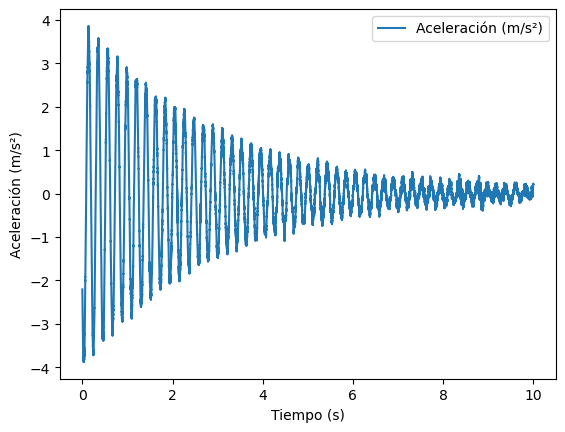

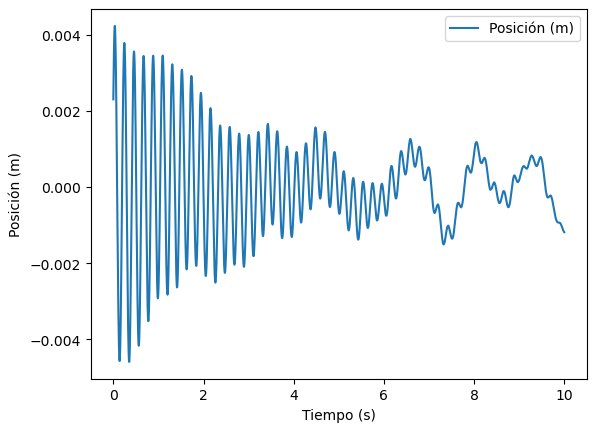

0        0.002302
1        0.002324
2        0.002345
3        0.002366
4        0.002387
           ...   
51196   -0.001184
51197   -0.001184
51198   -0.001184
51199   -0.001184
51200   -0.001184
Name: posicion, Length: 51201, dtype: float64

In [50]:
integrar(w5120, 10, 5120)

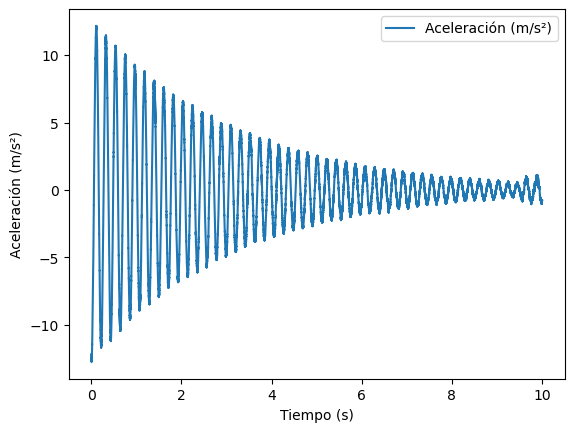

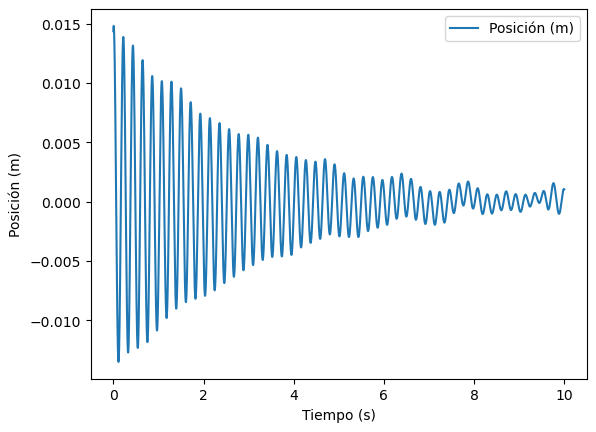

0         0.014365
1         0.014375
2         0.014385
3         0.014395
4         0.014405
            ...   
102396    0.001038
102397    0.001037
102398    0.001036
102399    0.001036
102400    0.001035
Name: posicion, Length: 102401, dtype: float64

In [51]:
integrar(w10240, 10,10240)


Se definen variables que representen la ruta de acceso para los datos de posición obtenidos (que fueron guardados en una carpeta como archivos CSV)

In [52]:
"""POSICIONES VS TIEMPO"""
posicion640=r"C:\Users\chelo\Documents\Vibras laboratorio 2\NF\Pos vs tiempo 640 Hz (de muestreo).csv"
posicion1280=r"C:\Users\chelo\Documents\Vibras laboratorio 2\NF\\Pos vs tiempo 1280 Hz (de muestreo).csv"
posicion2560=r"C:\Users\chelo\Documents\Vibras laboratorio 2\NF\\Pos vs tiempo 2560 Hz (de muestreo).csv"
posicion5120=r"C:\Users\chelo\Documents\Vibras laboratorio 2\NF\\Pos vs tiempo 5120 Hz (de muestreo).csv"
posicion10240=r"C:\Users\chelo\Documents\Vibras laboratorio 2\NF\\Pos vs tiempo 10240 Hz (de muestreo).csv"




Código para calcular la frecuencia natural

In [53]:
#Función que utiliza ajustes para la señal de posición vs tiempo. De esta manera se obtiene el parámetro B, delta, xi y por lo tanto w_n=B/xi

def frecuencia_natural(path, time1=10):
    # Cargar los datos y asegurar que se lean como texto
    tabla = pd.read_csv(path, sep="\t", header=None, names=["tiempo_posicion"], dtype={"tiempo_posicion": str})
    
    # Separar los valores en las columnas 'tiempo' y 'posición'
    tabla[['tiempo', 'posición']] = tabla['tiempo_posicion'].str.split(' ', expand=True).astype(float)

    # Filtrar datos hasta el tiempo especificado
    tabla_filtrada = tabla[tabla["tiempo"] <= time1]

    # Datos de tiempo y posición filtrados
    tiempo = tabla_filtrada["tiempo"].values
    posicion = tabla_filtrada["posición"].values

    # Definir la función de ajuste incluyendo la frecuencia como parámetro
    def ajuste_func(t, A, B, frecuencia, phi):
        omega = 2 * np.pi * frecuencia
        return A * np.exp(-B * t) * np.sin(omega * t + phi)

    # Realizar el ajuste, especificando 4.7 como semilla para la frecuencia
    params, _ = curve_fit(ajuste_func, tiempo, posicion, p0=[1, 0.1, 4.7, 0])

    # Obtener los parámetros ajustados
    A, B, frecuencia, phi = params
    print(f"A = {A}, B = {B}, frecuencia = {frecuencia}, phi = {phi}")

    # Generar la función ajustada en el intervalo de tiempo
    tiempo_ajustado = np.linspace(0, time1, 1000)
    posicion_ajustada = ajuste_func(tiempo_ajustado, A, B, frecuencia, phi)

    # Encontrar todos los picos
    picos, _ = find_peaks(posicion_ajustada)

    # Obtener los tiempos y valores de todos los picos
    tiempos_picos = tiempo_ajustado[picos]
    valores_picos = posicion_ajustada[picos]

    # Calcular delta para cada par de picos consecutivos
    deltas = []
    for i in range(len(valores_picos) - 1):
        delta = np.log(valores_picos[i] / valores_picos[i + 1])
        deltas.append(delta)
        print(f"Delta entre pico {i+1} y pico {i+2}: {delta:.4f}")

    # Calcular el promedio de todos los deltas
    promedio_delta = np.mean(deltas)
    print("Promedio de delta:", promedio_delta)

    # Calcular el coeficiente de amortiguamiento xhi usando el promedio de delta
    xhi = promedio_delta / (np.sqrt(4 * np.pi**2 + promedio_delta**2))
    frecuencia_natural = B / xhi
    print("xhi:", xhi)
    print("frecuencia natural (rad/s):", frecuencia_natural)
    print("nu natural (Hz):", frecuencia_natural / (2 * np.pi))

    # Graficar los datos, el ajuste y los picos
    plt.plot(tabla["tiempo"], tabla["posición"], 'b-', label="Datos sin filtrar")
    plt.plot(tiempo_ajustado, posicion_ajustada, 'r--', label=f"Ajuste hasta {time1}s")
    plt.plot(tiempos_picos, valores_picos, 'go', label="Picos")
    plt.xlabel("Tiempo")
    plt.ylabel("Posición")
    plt.legend()
    plt.show()



Se calcula la frecuencia natural para cada frecuencia de muestreo 

A = -0.0073497556883224974, B = 0.34068996439353627, frecuencia = 4.710087543420524, phi = 0.24615634101657277
Delta entre pico 1 y pico 2: 0.0750
Delta entre pico 2 y pico 3: 0.0789
Delta entre pico 3 y pico 4: 0.0680
Delta entre pico 4 y pico 5: 0.0681
Delta entre pico 5 y pico 6: 0.0720
Delta entre pico 6 y pico 7: 0.0759
Delta entre pico 7 y pico 8: 0.0792
Delta entre pico 8 y pico 9: 0.0651
Delta entre pico 9 y pico 10: 0.0690
Delta entre pico 10 y pico 11: 0.0729
Delta entre pico 11 y pico 12: 0.0768
Delta entre pico 12 y pico 13: 0.0758
Delta entre pico 13 y pico 14: 0.0661
Delta entre pico 14 y pico 15: 0.0699
Delta entre pico 15 y pico 16: 0.0738
Delta entre pico 16 y pico 17: 0.0777
Delta entre pico 17 y pico 18: 0.0724
Delta entre pico 18 y pico 19: 0.0670
Delta entre pico 19 y pico 20: 0.0708
Delta entre pico 20 y pico 21: 0.0747
Delta entre pico 21 y pico 22: 0.0786
Delta entre pico 22 y pico 23: 0.0690
Delta entre pico 23 y pico 24: 0.0679
Delta entre pico 24 y pico 25: 0

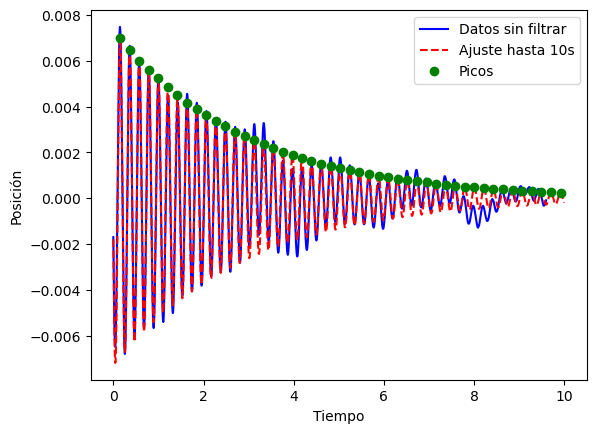

In [54]:
frecuencia_natural(posicion640,10)

A = -0.007779612644936737, B = 0.33476009938376716, frecuencia = 4.709154937577501, phi = -1.534709699791732
Delta entre pico 1 y pico 2: 0.0741
Delta entre pico 2 y pico 3: 0.0782
Delta entre pico 3 y pico 4: 0.0649
Delta entre pico 4 y pico 5: 0.0674
Delta entre pico 5 y pico 6: 0.0714
Delta entre pico 6 y pico 7: 0.0754
Delta entre pico 7 y pico 8: 0.0749
Delta entre pico 8 y pico 9: 0.0647
Delta entre pico 9 y pico 10: 0.0687
Delta entre pico 10 y pico 11: 0.0727
Delta entre pico 11 y pico 12: 0.0768
Delta entre pico 12 y pico 13: 0.0700
Delta entre pico 13 y pico 14: 0.0660
Delta entre pico 14 y pico 15: 0.0700
Delta entre pico 15 y pico 16: 0.0740
Delta entre pico 16 y pico 17: 0.0781
Delta entre pico 17 y pico 18: 0.0652
Delta entre pico 18 y pico 19: 0.0673
Delta entre pico 19 y pico 20: 0.0713
Delta entre pico 20 y pico 21: 0.0754
Delta entre pico 21 y pico 22: 0.0752
Delta entre pico 22 y pico 23: 0.0646
Delta entre pico 23 y pico 24: 0.0686
Delta entre pico 24 y pico 25: 0.0

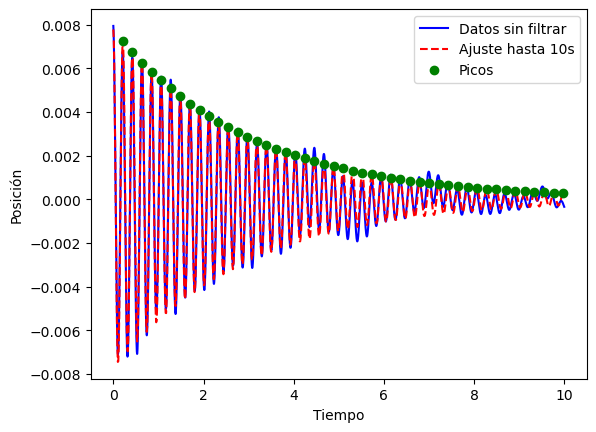

In [55]:
frecuencia_natural(posicion1280,10)

A = 0.007282336623085359, B = 0.3441815857863288, frecuencia = 4.710324087344005, phi = 1.3037633640013875
Delta entre pico 1 y pico 2: 0.0725
Delta entre pico 2 y pico 3: 0.0763
Delta entre pico 3 y pico 4: 0.0801
Delta entre pico 4 y pico 5: 0.0666
Delta entre pico 5 y pico 6: 0.0694
Delta entre pico 6 y pico 7: 0.0733
Delta entre pico 7 y pico 8: 0.0771
Delta entre pico 8 y pico 9: 0.0781
Delta entre pico 9 y pico 10: 0.0664
Delta entre pico 10 y pico 11: 0.0702
Delta entre pico 11 y pico 12: 0.0741
Delta entre pico 12 y pico 13: 0.0779
Delta entre pico 13 y pico 14: 0.0751
Delta entre pico 14 y pico 15: 0.0672
Delta entre pico 15 y pico 16: 0.0710
Delta entre pico 16 y pico 17: 0.0749
Delta entre pico 17 y pico 18: 0.0787
Delta entre pico 18 y pico 19: 0.0720
Delta entre pico 19 y pico 20: 0.0680
Delta entre pico 20 y pico 21: 0.0718
Delta entre pico 21 y pico 22: 0.0757
Delta entre pico 22 y pico 23: 0.0795
Delta entre pico 23 y pico 24: 0.0690
Delta entre pico 24 y pico 25: 0.068

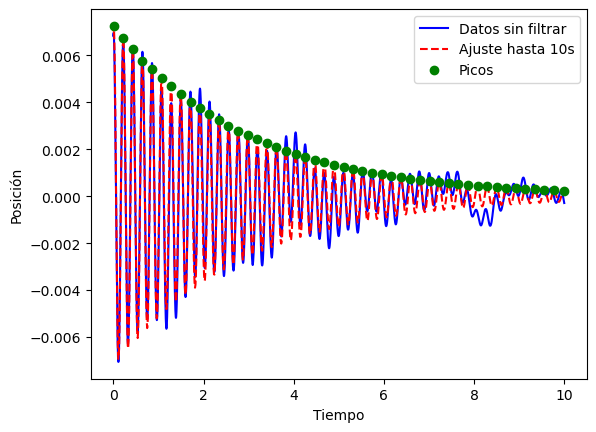

In [56]:
frecuencia_natural(posicion2560,10)

A = 0.004680662880929578, B = 0.36926141758473136, frecuencia = 4.721640559746997, phi = 0.5128017371648688
Delta entre pico 1 y pico 2: 0.0726
Delta entre pico 2 y pico 3: 0.0748
Delta entre pico 3 y pico 4: 0.0770
Delta entre pico 4 y pico 5: 0.0792
Delta entre pico 5 y pico 6: 0.0814
Delta entre pico 6 y pico 7: 0.0837
Delta entre pico 7 y pico 8: 0.0747
Delta entre pico 8 y pico 9: 0.0741
Delta entre pico 9 y pico 10: 0.0763
Delta entre pico 10 y pico 11: 0.0785
Delta entre pico 11 y pico 12: 0.0807
Delta entre pico 12 y pico 13: 0.0829
Delta entre pico 13 y pico 14: 0.0786
Delta entre pico 14 y pico 15: 0.0734
Delta entre pico 15 y pico 16: 0.0756
Delta entre pico 16 y pico 17: 0.0778
Delta entre pico 17 y pico 18: 0.0800
Delta entre pico 18 y pico 19: 0.0822
Delta entre pico 19 y pico 20: 0.0825
Delta entre pico 20 y pico 21: 0.0726
Delta entre pico 21 y pico 22: 0.0748
Delta entre pico 22 y pico 23: 0.0770
Delta entre pico 23 y pico 24: 0.0792
Delta entre pico 24 y pico 25: 0.08

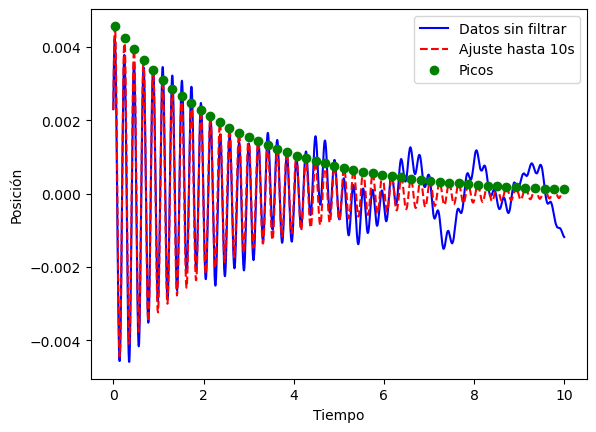

In [57]:
frecuencia_natural(posicion5120,10)

A = 0.014748301534071055, B = 0.3325299099390082, frecuencia = 4.697428583817337, phi = 1.2544822401375526
Delta entre pico 1 y pico 2: 0.0747
Delta entre pico 2 y pico 3: 0.0751
Delta entre pico 3 y pico 4: 0.0638
Delta entre pico 4 y pico 5: 0.0700
Delta entre pico 5 y pico 6: 0.0763
Delta entre pico 6 y pico 7: 0.0707
Delta entre pico 7 y pico 8: 0.0654
Delta entre pico 8 y pico 9: 0.0716
Delta entre pico 9 y pico 10: 0.0778
Delta entre pico 10 y pico 11: 0.0664
Delta entre pico 11 y pico 12: 0.0670
Delta entre pico 12 y pico 13: 0.0732
Delta entre pico 13 y pico 14: 0.0792
Delta entre pico 14 y pico 15: 0.0623
Delta entre pico 15 y pico 16: 0.0685
Delta entre pico 16 y pico 17: 0.0748
Delta entre pico 17 y pico 18: 0.0748
Delta entre pico 18 y pico 19: 0.0639
Delta entre pico 19 y pico 20: 0.0701
Delta entre pico 20 y pico 21: 0.0764
Delta entre pico 21 y pico 22: 0.0705
Delta entre pico 22 y pico 23: 0.0655
Delta entre pico 23 y pico 24: 0.0717
Delta entre pico 24 y pico 25: 0.078

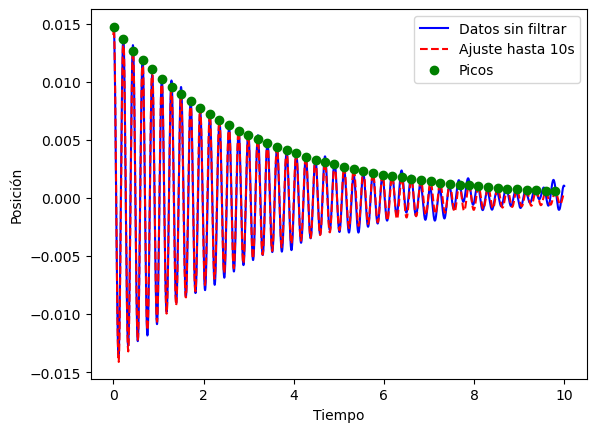

In [58]:
frecuencia_natural(posicion10240,10)

Se definen variables que representen la ruta de acceso para las señales de oscilación forzada amortiguada obtenida 

In [59]:
F1=r"C:\Users\chelo\Downloads\Vibras-Mec-nicas-main\Vibras-Mec-nicas-main\LAB 02\Mediciones limpias\Parte 2\Test(2024-10-10,16-33-58)\F1.csv"
F2=r"c:\Users\chelo\Downloads\Vibras-Mec-nicas-main\Vibras-Mec-nicas-main\LAB 02\Mediciones limpias\Parte 2\Test(2024-10-10,16-35-08)\F2.csv"
F3=r"C:\Users\chelo\Downloads\Vibras-Mec-nicas-main\Vibras-Mec-nicas-main\LAB 02\Mediciones limpias\Parte 2\Test(2024-10-10,16-36-32)\F3.csv"
F4=r"C:\Users\chelo\Downloads\Vibras-Mec-nicas-main\Vibras-Mec-nicas-main\LAB 02\Mediciones limpias\Parte 2\Test(2024-10-10,16-37-18)\F4.csv"
F5=r"C:\Users\chelo\Downloads\Vibras-Mec-nicas-main\Vibras-Mec-nicas-main\LAB 02\Mediciones limpias\Parte 2\Test(2024-10-10,16-38-41)\F5.csv"
F6=r"C:\Users\chelo\Downloads\Vibras-Mec-nicas-main\Vibras-Mec-nicas-main\LAB 02\Mediciones limpias\Parte 2\Test(2024-10-10,16-39-58)\F6.csv"
F7=r"C:\Users\chelo\Downloads\Vibras-Mec-nicas-main\Vibras-Mec-nicas-main\LAB 02\Mediciones limpias\Parte 2\Test(2024-10-10,16-40-32)\F7.csv"
F8=r"C:\Users\chelo\Downloads\Vibras-Mec-nicas-main\Vibras-Mec-nicas-main\LAB 02\Mediciones limpias\Parte 2\Test(2024-10-10,16-41-12)\F8.csv"


Se define una función análoga a la utilizada para obtener la posición para el sistema amortiguado sin forzamiento. 
Solo cambia la ruta en la cual se guarda el archivo CSV que posee los datos de la posición en el tiempo.

In [60]:
def integrar_forzado(path,forzamiento, time1):
    output_filename=rf"c:\Users\chelo\Documents\Vibras laboratorio 2\Forzado\Pos vs tiempo (forzado) {forzamiento} Hz (de muestreo).csv"
    # Cargar los datos desde el archivo CSV
    data = pd.read_csv(path, sep="\t", names=["tiempo", "aceleracion"])
    # Filtrar datos hasta el tiempo especificado
    data = data[data["tiempo"] <= time1]

    # Convertir aceleración de g a m/s²
    data["aceleracion"] *= 9.81
    
    # Graficar la aceleración para verificar su forma
    plt.figure()
    plt.plot(data["tiempo"], data["aceleracion"], label="Aceleración (m/s²)")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Aceleración (m/s²)")
    #plt.title("Aceleración en función del tiempo")
    plt.legend()
    plt.show()

    # Integrar la aceleración para obtener la velocidad
    velocidad = cumtrapz(data["aceleracion"], data["tiempo"], initial=0)

    # Integrar la velocidad para obtener la posición
    posicion = cumtrapz(velocidad, data["tiempo"], initial=0)
    posicion = detrend(posicion)

    # Ajustar el tamaño del DataFrame para que coincida con las longitudes de 'velocidad' y 'posicion'
    data = data.iloc[:len(velocidad)]

    # Agregar las columnas de velocidad y posición al DataFrame
    data["velocidad"] = velocidad
    data["posicion"] = posicion

    # Crear una nueva columna con "tiempo" y "posicion" combinados, separados por un espacio
    data["tiempo_posicion"] = data["tiempo"].astype(str) + " " + data["posicion"].astype(str)

    # Guardar solo la columna combinada en el archivo CSV especificado
    data[["tiempo_posicion"]].to_csv(output_filename, index=False, header=False)

    # Graficar posición vs tiempo
    plt.figure()
    plt.plot(data["tiempo"], data["posicion"], label="Posición (m)")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Posición (m)")
    #plt.title("Posición vs. Tiempo")
    plt.legend()
    plt.show()

    return data["posicion"]

# Llama a la función con el archivo adecuado, tiempo de corte y nombre de salida


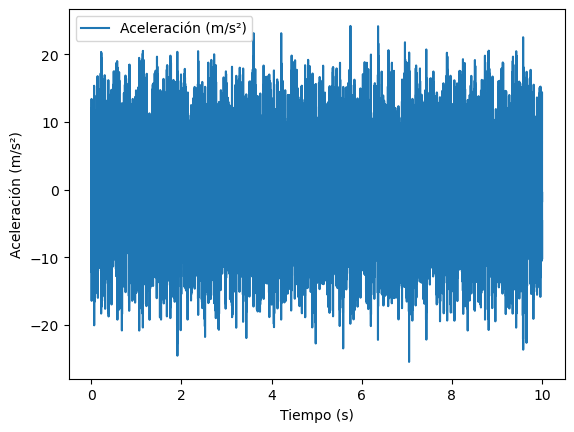

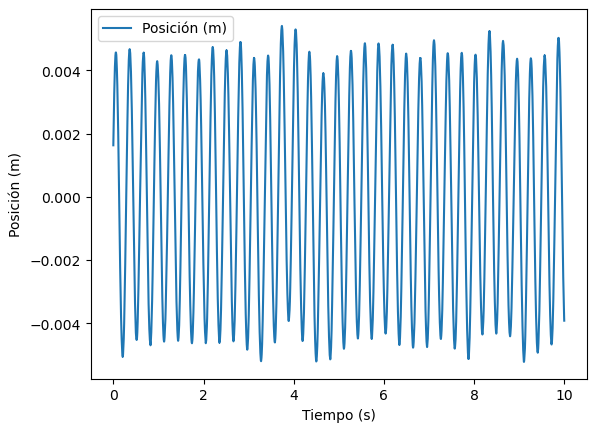

0         0.001631
1         0.001640
2         0.001649
3         0.001658
4         0.001667
            ...   
102395   -0.003903
102396   -0.003908
102397   -0.003912
102398   -0.003917
102399   -0.003922
Name: posicion, Length: 102400, dtype: float64

In [61]:
integrar_forzado(F1,1,10)

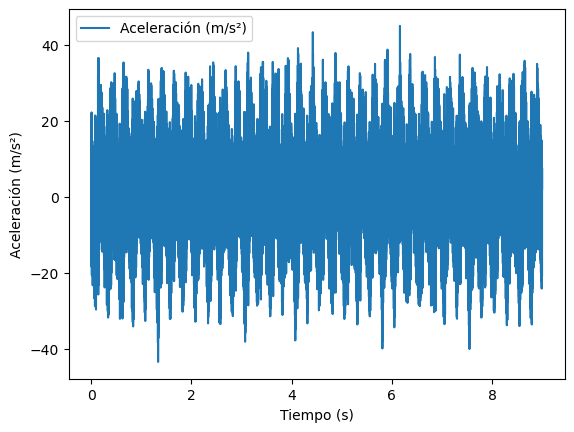

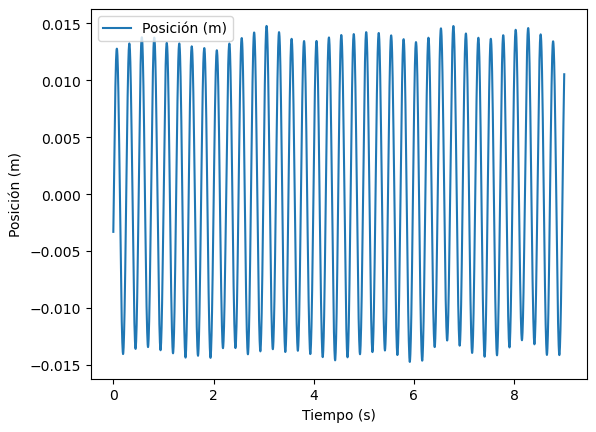

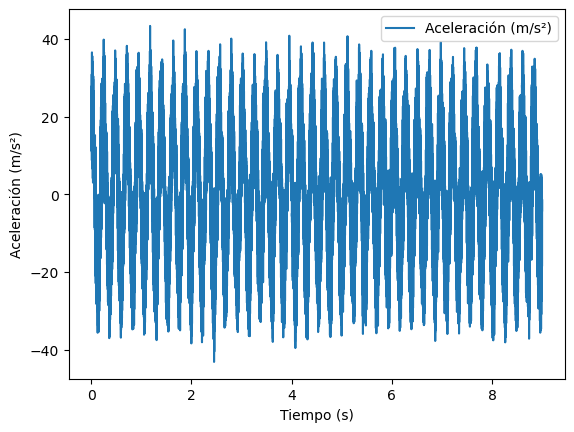

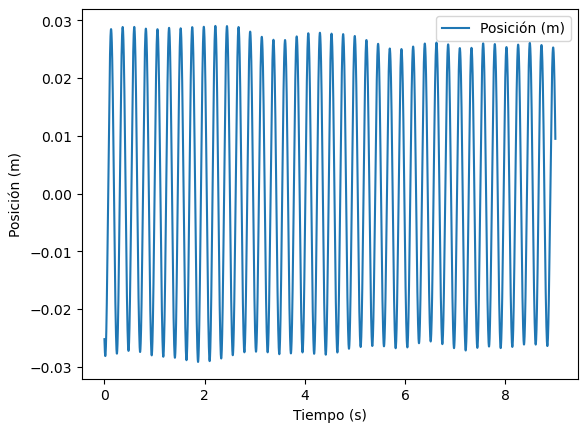

0       -0.025208
1       -0.025240
2       -0.025273
3       -0.025305
4       -0.025337
           ...   
92155    0.009737
92156    0.009673
92157    0.009610
92158    0.009546
92159    0.009482
Name: posicion, Length: 92160, dtype: float64

In [62]:
integrar_forzado(F2,2,10)
integrar_forzado(F3,3,10)


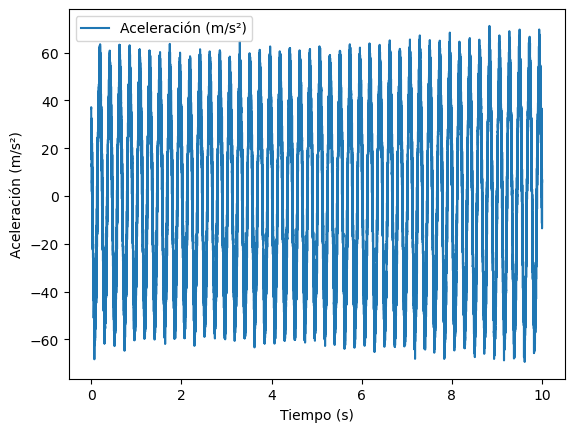

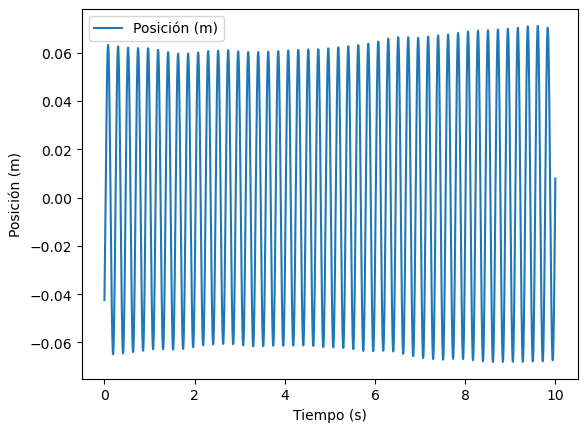

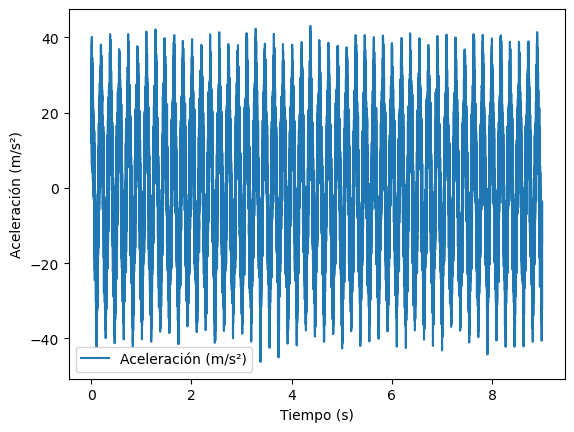

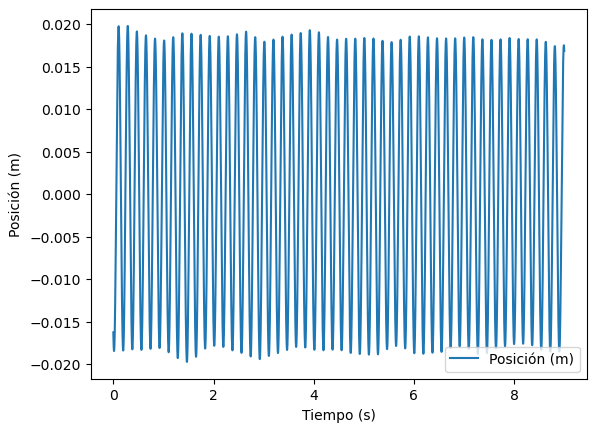

0       -0.016271
1       -0.016300
2       -0.016329
3       -0.016359
4       -0.016388
           ...   
92155    0.016901
92156    0.016885
92157    0.016869
92158    0.016853
92159    0.016836
Name: posicion, Length: 92160, dtype: float64

In [63]:
integrar_forzado(F4,4,10)
integrar_forzado(F5,5,10)

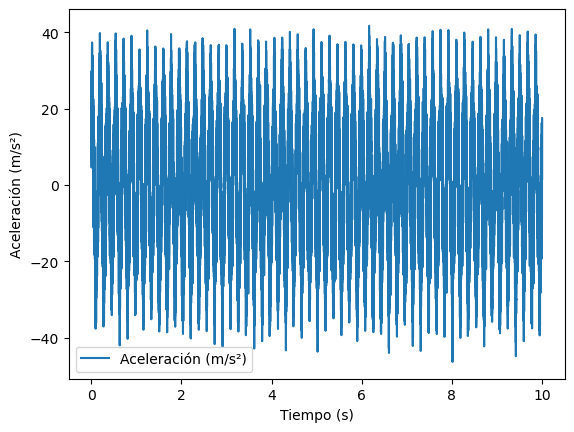

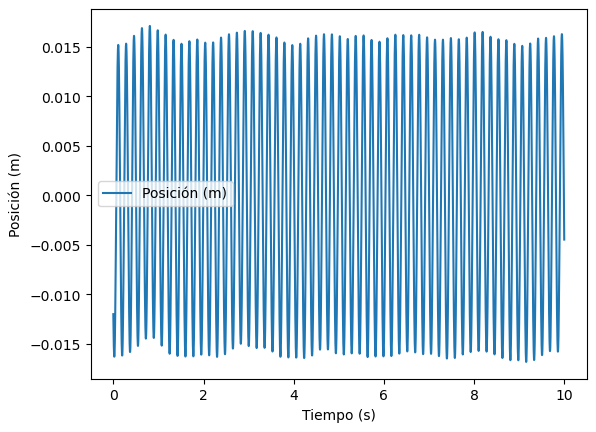

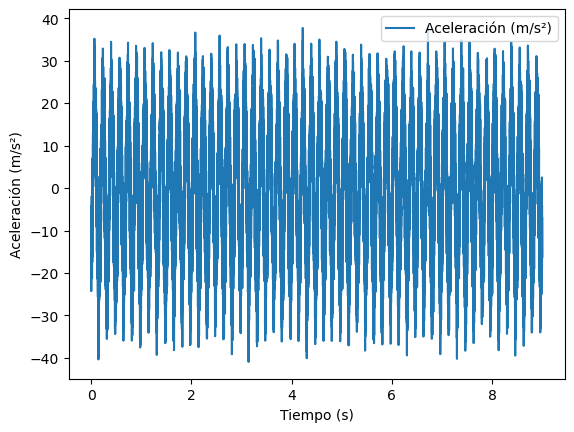

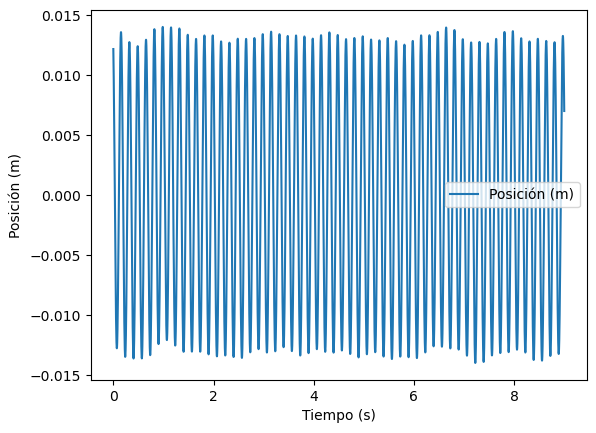

0        0.012167
1        0.012145
2        0.012122
3        0.012099
4        0.012076
           ...   
92155    0.007161
92156    0.007120
92157    0.007079
92158    0.007038
92159    0.006997
Name: posicion, Length: 92160, dtype: float64

In [64]:
integrar_forzado(F6,6,10)
integrar_forzado(F7,7,10)

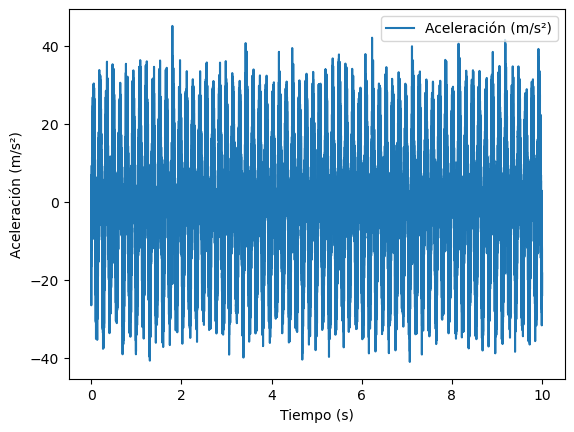

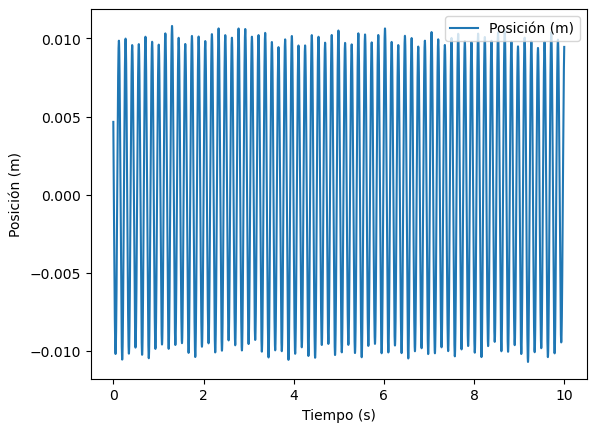

0         0.004661
1         0.004627
2         0.004592
3         0.004557
4         0.004522
            ...   
102395    0.009414
102396    0.009425
102397    0.009436
102398    0.009447
102399    0.009458
Name: posicion, Length: 102400, dtype: float64

In [65]:
integrar_forzado(F8,8,10)


Función para obtener la frecuencia del sistema amortiguado, mediante el uso de la transformada de Fourier, aplicada en el archivo de "posición" vs "tiempo"

In [66]:
#A partir de la señal obtenida del acelerómetro. Llama a la función "integrar" para obtener la posición vs tiempo, con lo cual
#obtiene la frecuencia amortiguada w_d mediante la transformada de Fourier

def obtener_frecuencia(path,muestreo, time1=10, rango=75):
    print("Para muestreo", muestreo, "Hz")
    # Cargar los datos
    tabla = pd.read_csv(path, sep="\t", names=["tiempo", "posición"])
    # Filtrar los primeros 5 segundos
    tabla_5s = tabla[tabla["tiempo"] <= time1]


    # Transformada de Fourier
    # Definir la señal y la frecuencia de muestreo para los primeros 5 segundos
    POSICION=integrar(path, time1, muestreo)
    signal = POSICION.values
    time = tabla_5s["tiempo"].values
    sampling_rate = 1 / np.mean(np.diff(time))  # Calcular la frecuencia de muestreo
    

    # Aplicar la transformada de Fourier
    fft_values = np.fft.fft(signal)
    fft_freq = np.fft.fftfreq(len(signal), d=1/sampling_rate)
    # Graficar la amplitud en función de la frecuencia, incluyendo la parte negativa
   
    # Gráfico de transformada de Fourier en el rango de -100 a +100 Hz
    # Seleccionar solo el rango deseado
    mask = (fft_freq >= -rango) & (fft_freq <= rango)
    fft_freq_rango = fft_freq[mask]
    fft_values_rango = np.abs(fft_values[mask])

    # Encontrar los picos en el espectro de Fourier
    peaks, properties = find_peaks(fft_values_rango, height=0)

    # Obtener las frecuencias y amplitudes correspondientes a los picos
    frecuencias_peaks = fft_freq_rango[peaks]
    amplitudes_peaks = fft_values_rango[peaks]

    # Seleccionar los dos picos de mayor amplitud
    indices_top2 = np.argsort(amplitudes_peaks)[-2:]  # Obtener los índices de los 2 picos más altos
    frecuencias_top2 = frecuencias_peaks[indices_top2]
    amplitudes_top2 = amplitudes_peaks[indices_top2]

    # Imprimir los dos picos de mayor amplitud
    for f, a in zip(frecuencias_top2, amplitudes_top2):
        print(f"Frecuencia pico: {f:.2f} Hz, Amplitud: {a:.2f}")

    # Graficar el espectro con los dos picos de mayor amplitud
    plt.figure(figsize=(10, 5))
    """plt.title(f"Transformada de Fourier (rango de -{rango} a +{rango} Hz)  ({time1} segundos)")"""
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("Amplitud")
    plt.plot(fft_freq_rango, fft_values_rango, label="Espectro de Fourier")
    leyenda_picos = ', '.join([f"{f:.2f} Hz" for f in frecuencias_top2])
    plt.plot((frecuencias_top2),(amplitudes_top2), "rx", label=f"Amplitud frecuencia dominante ({np.abs(frecuencias_top2[0]):.3f}Hz)")
    # Crear la tabla con los picos

    plt.legend()
    plt.show()

# Ejemplo de uso
# obtener_frecuencia(r"C:\ruta\a\tu\archivo\DataRecor2.csv", 5)


Para muestreo 640 Hz


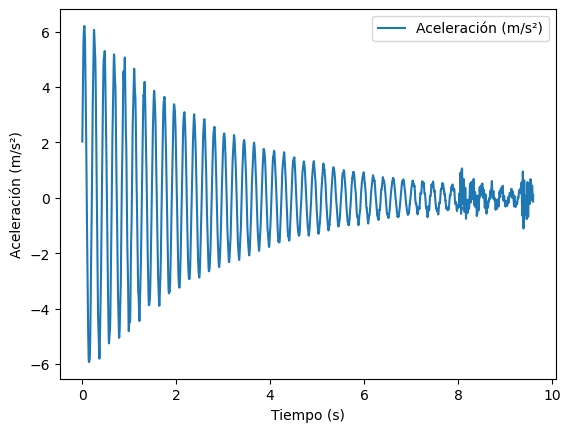

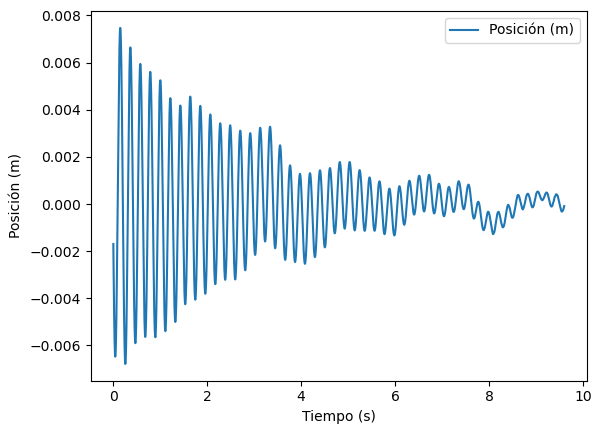

Frecuencia pico: 4.69 Hz, Amplitud: 6.12
Frecuencia pico: -4.69 Hz, Amplitud: 6.12


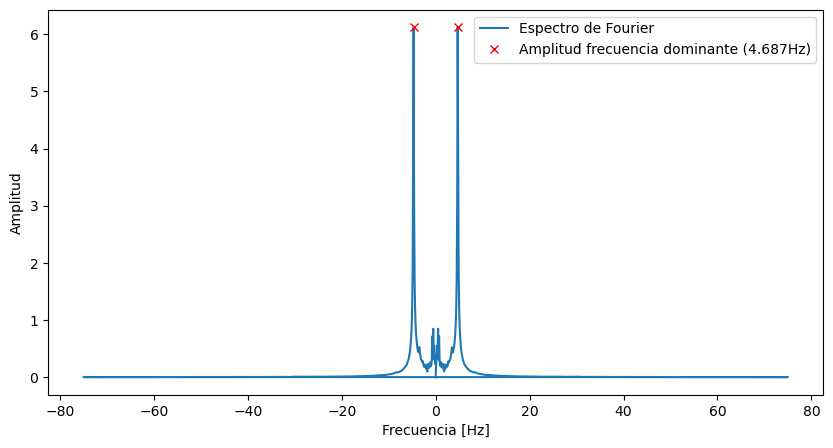

In [67]:
obtener_frecuencia(w640,640)

Para muestreo 1280 Hz


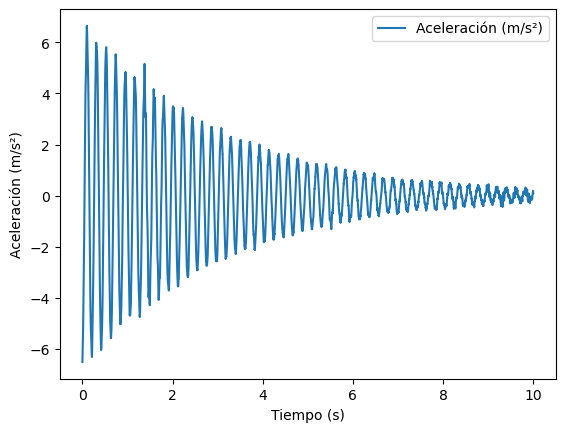

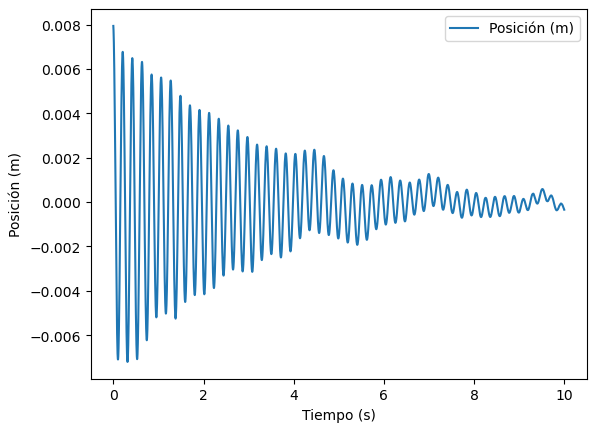

Frecuencia pico: 4.70 Hz, Amplitud: 13.82
Frecuencia pico: -4.70 Hz, Amplitud: 13.82


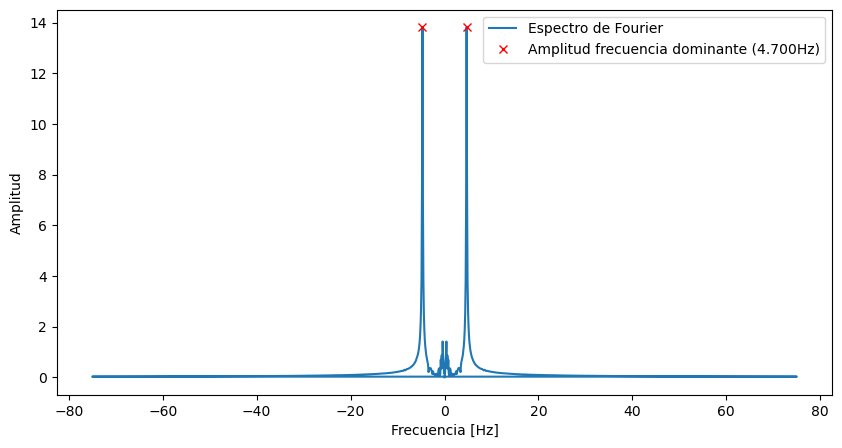

In [68]:
obtener_frecuencia(w1280,1280)

Para muestreo 2560 Hz


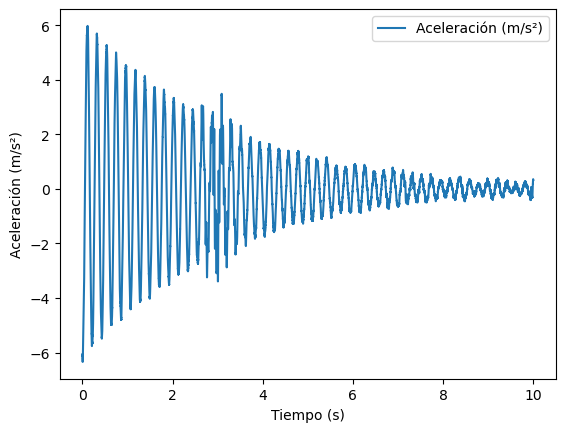

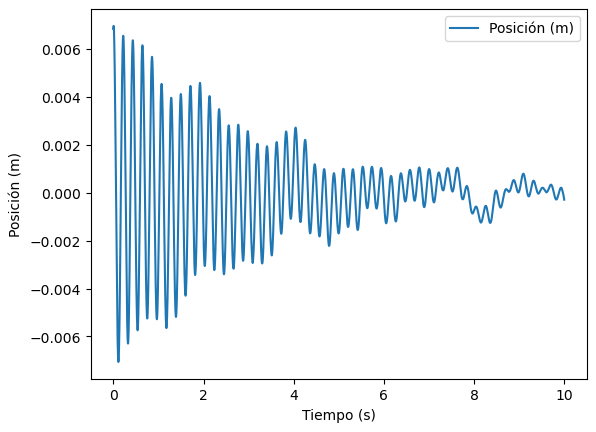

Frecuencia pico: 4.70 Hz, Amplitud: 25.17
Frecuencia pico: -4.70 Hz, Amplitud: 25.17


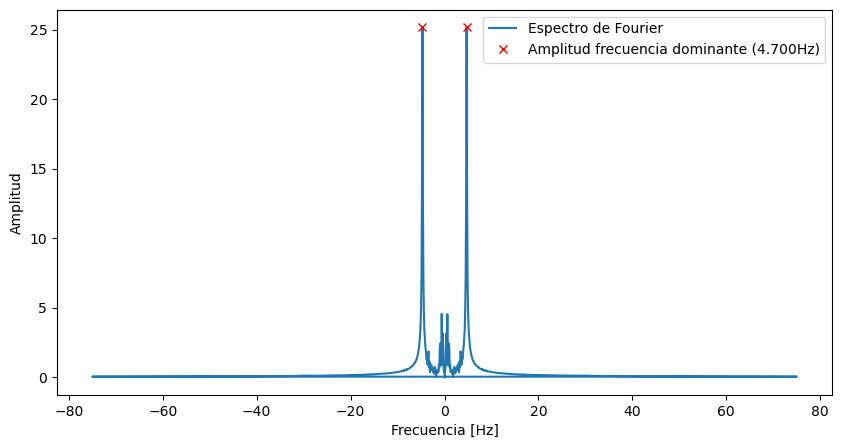

In [69]:
obtener_frecuencia(w2560,2560)

Para muestreo 5120 Hz


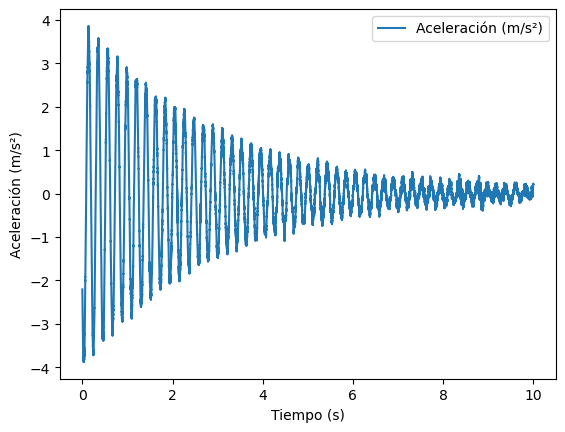

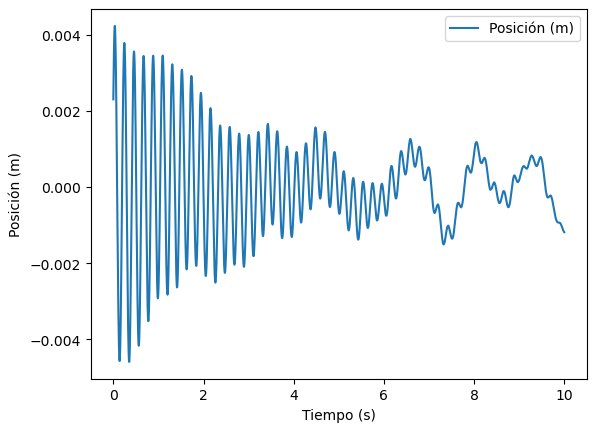

Frecuencia pico: -4.70 Hz, Amplitud: 28.94
Frecuencia pico: 4.70 Hz, Amplitud: 28.94


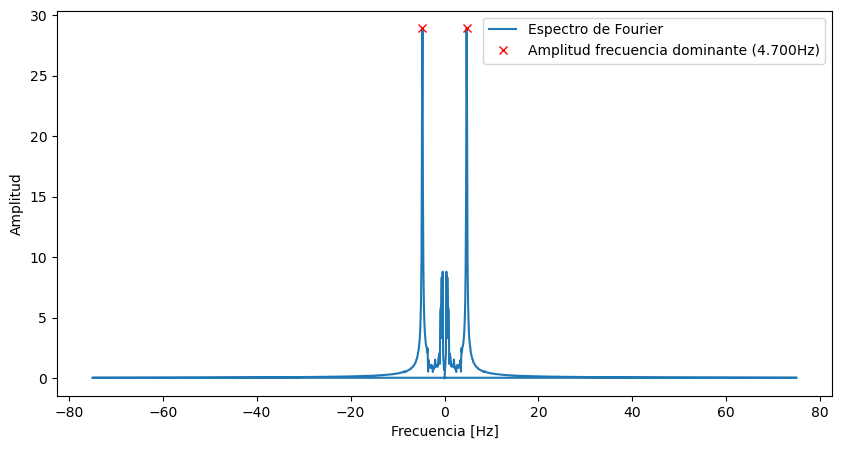

In [70]:
obtener_frecuencia(w5120,5120)

Para muestreo 10240 Hz


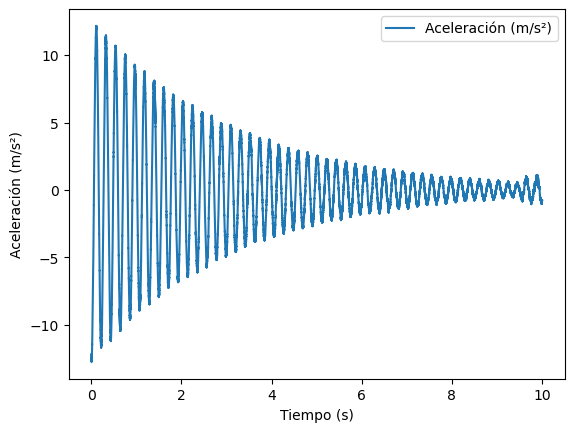

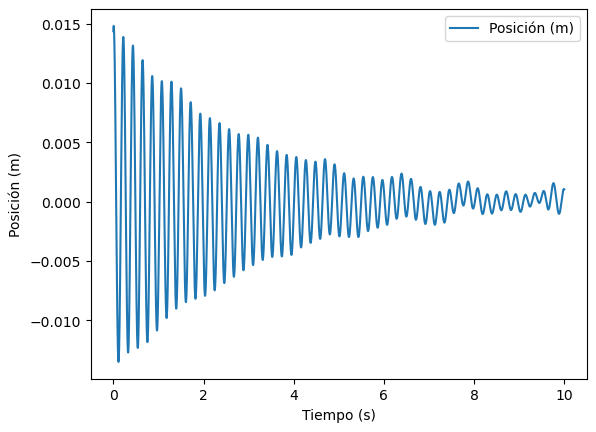

Frecuencia pico: -4.70 Hz, Amplitud: 218.43
Frecuencia pico: 4.70 Hz, Amplitud: 218.43


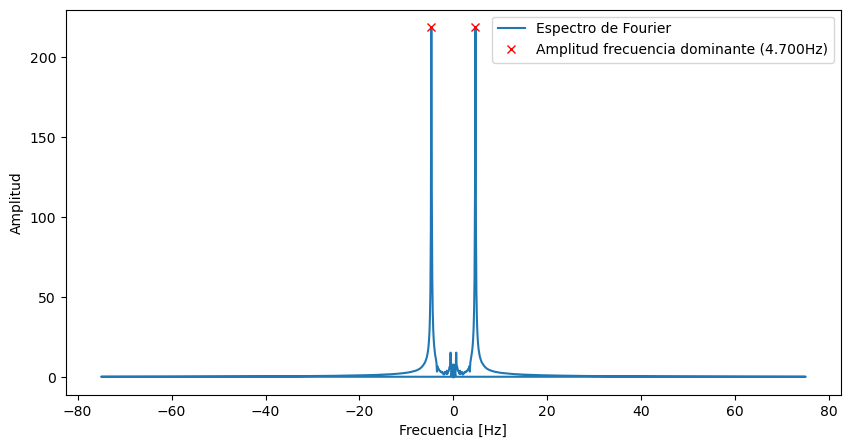

In [71]:
obtener_frecuencia(w10240,10240)

Función para obtener la frecuencia del sistema forzado amortiguado, mediante el uso de la transformada de Fourier, aplicada en el archivo de "posición" vs "tiempo"

In [72]:
#A partir de la señal obtenida del acelerómetro. Llama a la función "integrar_forzado" para obtener la posición vs tiempo, con lo cual
#obtiene la frecuencia amortiguada w_d mediante la transformada de Fourier

def obtener_frecuenciaF(path,forzamiento, time1=10, rango=75):
    # Cargar los datos
    tabla = pd.read_csv(path, sep="\t", names=["tiempo", "posición"])
    # Filtrar los primeros 5 segundos
    tabla_5s = tabla[tabla["tiempo"] <= time1]


    # Transformada de Fourier
    # Definir la señal y la frecuencia de muestreo para los primeros 5 segundos
    POSICION=integrar_forzado(path,forzamiento,time1)
    signal = POSICION.values
    time = tabla_5s["tiempo"].values
    sampling_rate = 1 / np.mean(np.diff(time))  # Calcular la frecuencia de muestreo
    

    # Aplicar la transformada de Fourier
    fft_values = np.fft.fft(signal)
    fft_freq = np.fft.fftfreq(len(signal), d=1/sampling_rate)
    # Graficar la amplitud en función de la frecuencia, incluyendo la parte negativa
   
    # Gráfico de transformada de Fourier en el rango de -100 a +100 Hz
    # Seleccionar solo el rango deseado
    mask = (fft_freq >= -rango) & (fft_freq <= rango)
    fft_freq_rango = fft_freq[mask]
    fft_values_rango = np.abs(fft_values[mask])

    # Encontrar los picos en el espectro de Fourier
    peaks, properties = find_peaks(fft_values_rango, height=0)

    # Obtener las frecuencias y amplitudes correspondientes a los picos
    frecuencias_peaks = fft_freq_rango[peaks]
    amplitudes_peaks = fft_values_rango[peaks]

    # Seleccionar los dos picos de mayor amplitud
    indices_top2 = np.argsort(amplitudes_peaks)[-2:]  # Obtener los índices de los 2 picos más altos
    frecuencias_top2 = frecuencias_peaks[indices_top2]
    amplitudes_top2 = amplitudes_peaks[indices_top2]

    # Imprimir los dos picos de mayor amplitud
    for f, a in zip(frecuencias_top2, amplitudes_top2):
        print(f"Frecuencia pico: {f:.2f} Hz, Amplitud: {a:.2f}")

    # Graficar el espectro con los dos picos de mayor amplitud
    plt.figure(figsize=(10, 5))
    """plt.title(f"Transformada de Fourier (rango de -{rango} a +{rango} Hz)  ({time1} segundos)")"""
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("Amplitud")
    plt.plot(fft_freq_rango, fft_values_rango, label="Espectro de Fourier")
    leyenda_picos = ', '.join([f"{f:.2f} Hz" for f in frecuencias_top2])
    plt.plot((frecuencias_top2),(amplitudes_top2), "rx", label=f"Amplitud frecuencia dominante ({np.abs(frecuencias_top2[0]):.3f}Hz)")
    # Crear la tabla con los picos

    plt.legend()
    plt.show()

# Ejemplo de uso
# obtener_frecuencia(r"C:\ruta\a\tu\archivo\DataRecor2.csv", 5)


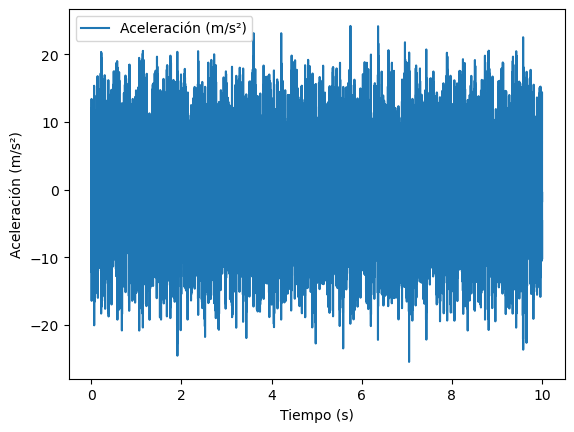

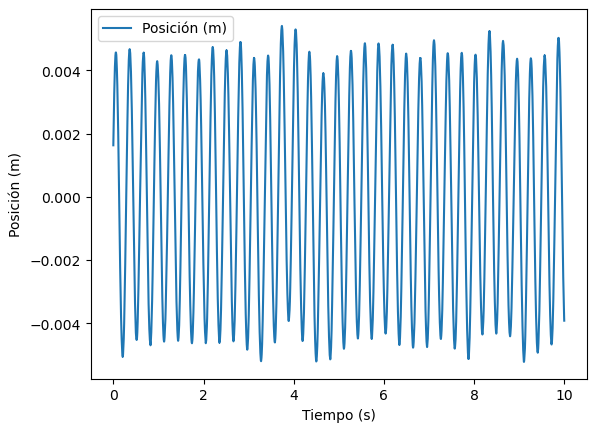

Frecuencia pico: 3.30 Hz, Amplitud: 179.55
Frecuencia pico: -3.30 Hz, Amplitud: 179.55


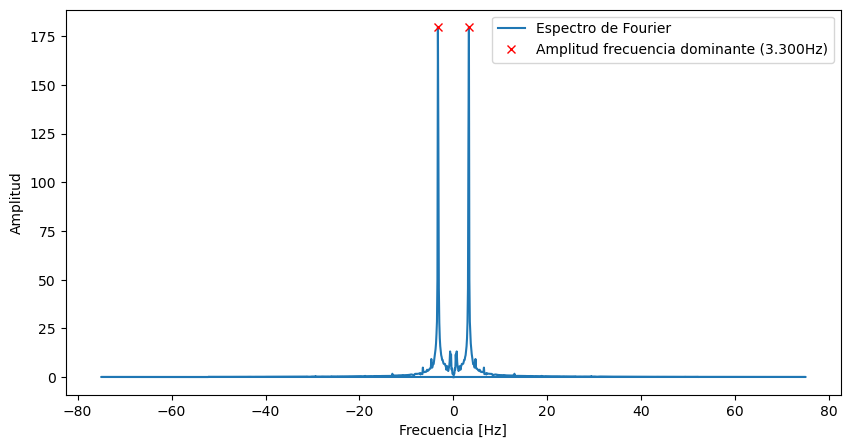

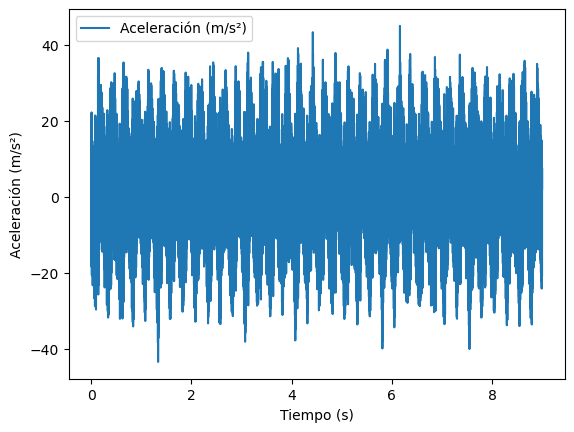

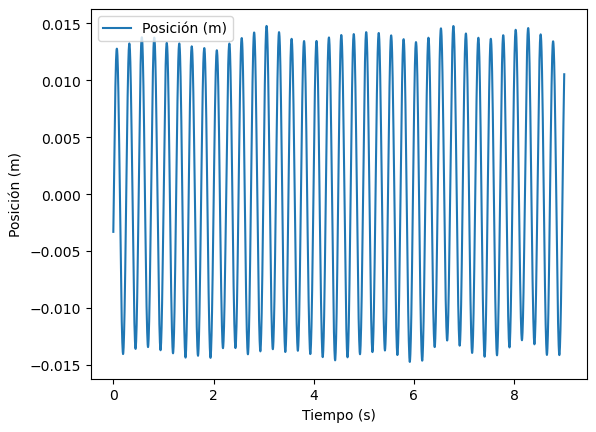

Frecuencia pico: -4.00 Hz, Amplitud: 599.14
Frecuencia pico: 4.00 Hz, Amplitud: 599.14


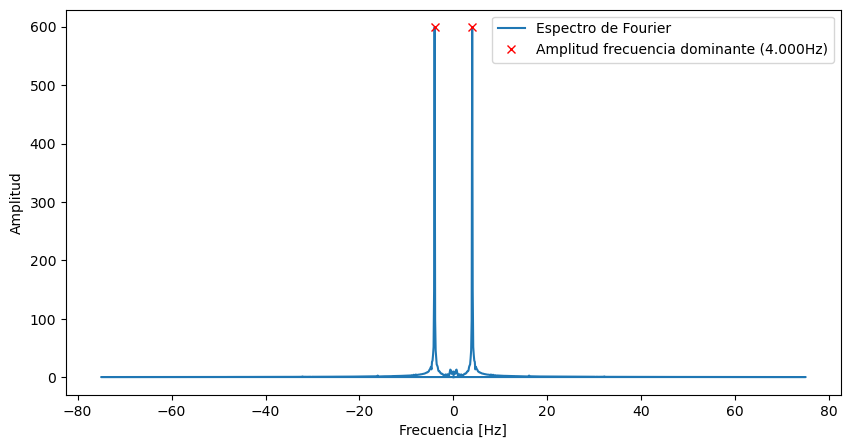

In [73]:
obtener_frecuenciaF(F1,1)
obtener_frecuenciaF(F2,2)

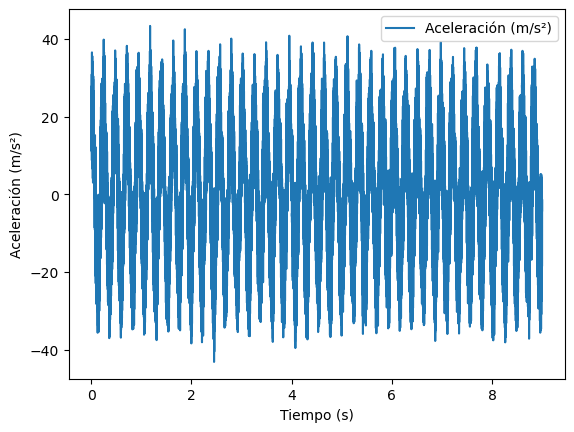

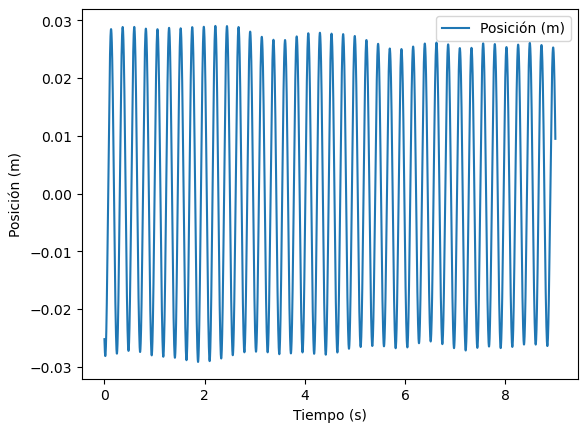

Frecuencia pico: -4.33 Hz, Amplitud: 1131.97
Frecuencia pico: 4.33 Hz, Amplitud: 1131.97


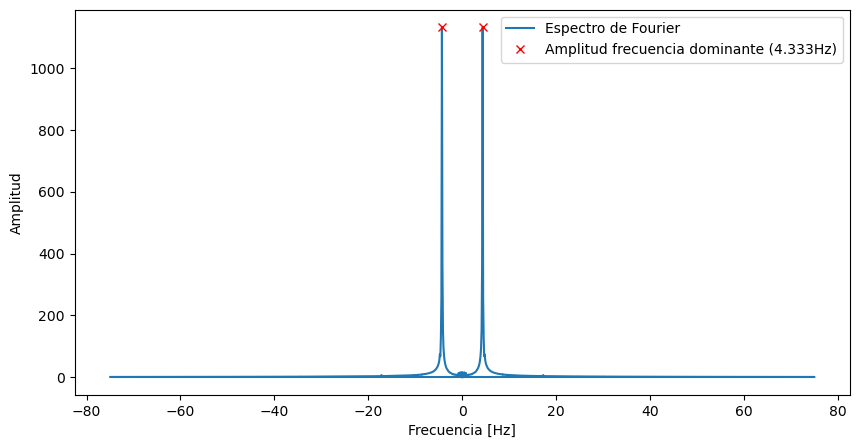

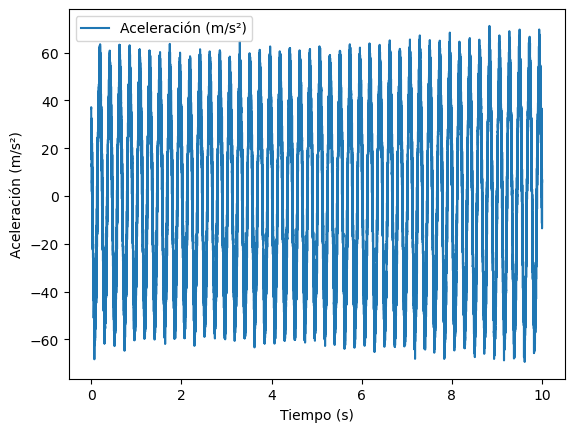

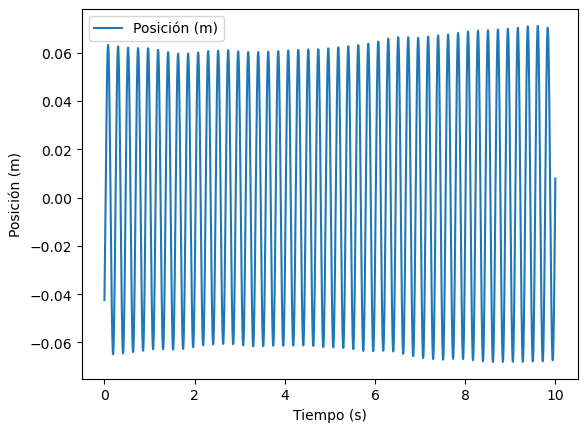

Frecuencia pico: 4.50 Hz, Amplitud: 3193.91
Frecuencia pico: -4.50 Hz, Amplitud: 3193.91


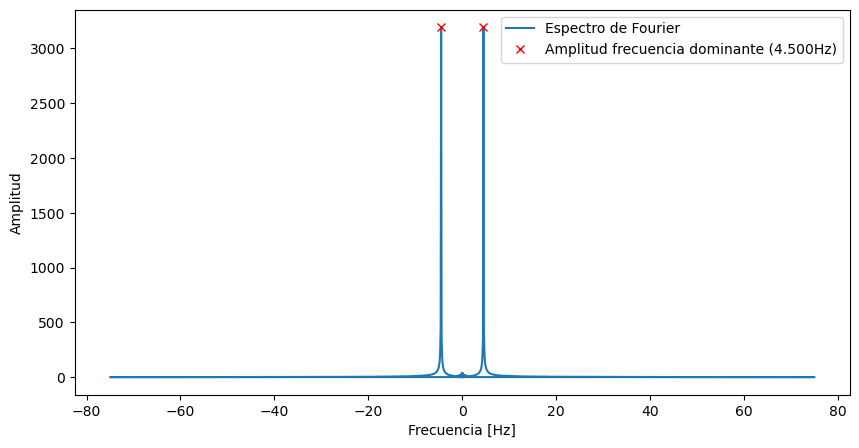

In [74]:
obtener_frecuenciaF(F3,3)
obtener_frecuenciaF(F4,4)



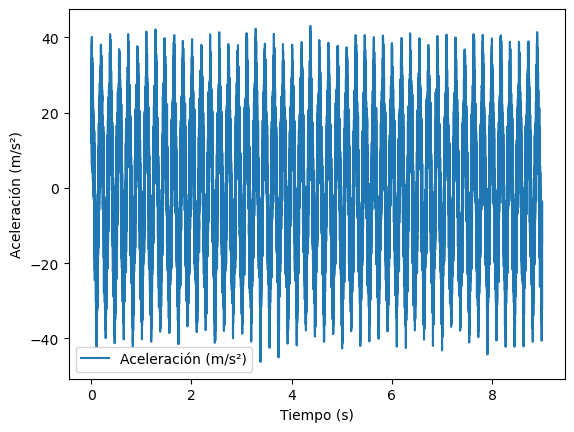

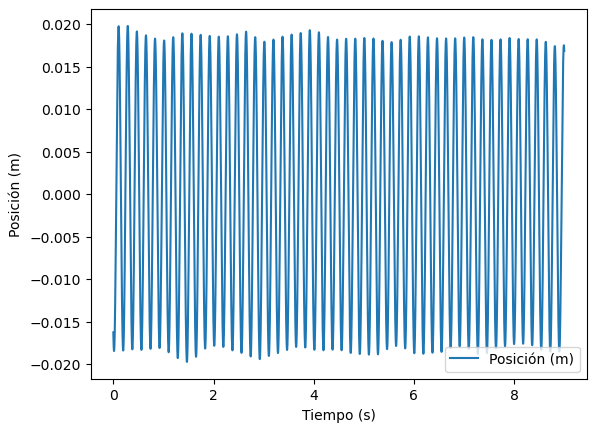

Frecuencia pico: -5.56 Hz, Amplitud: 653.48
Frecuencia pico: 5.56 Hz, Amplitud: 653.48


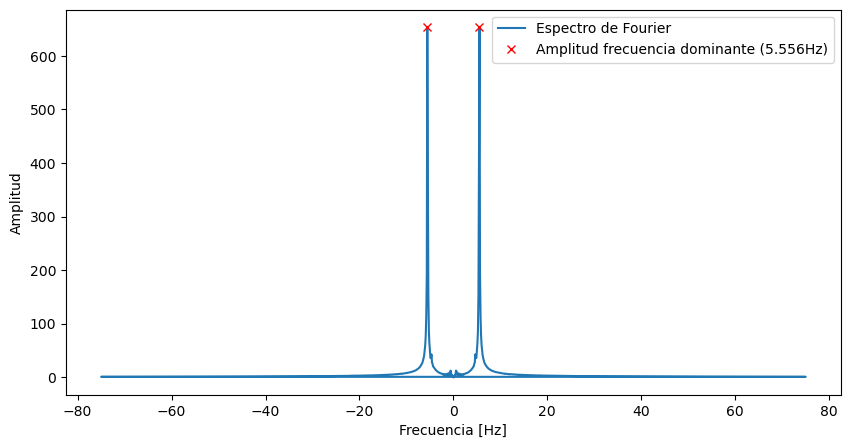

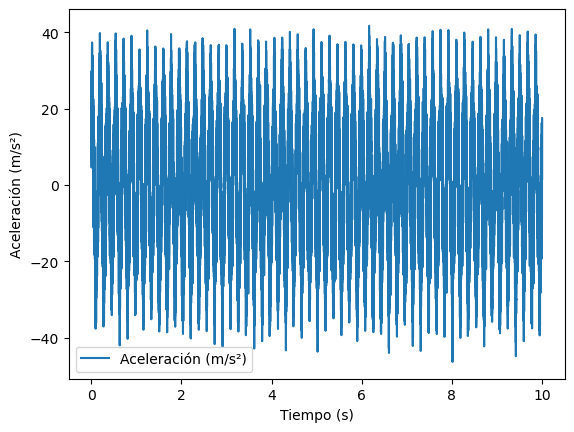

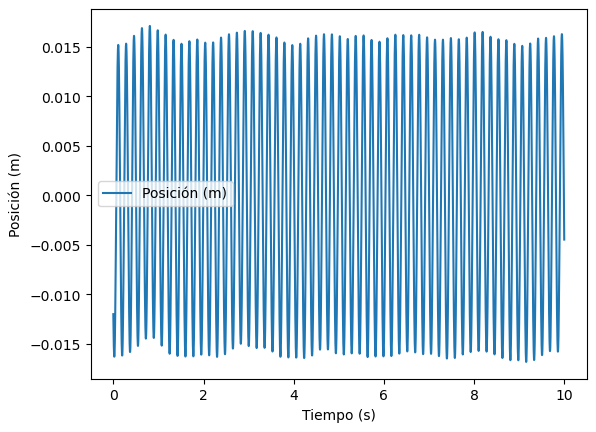

Frecuencia pico: -5.70 Hz, Amplitud: 803.49
Frecuencia pico: 5.70 Hz, Amplitud: 803.49


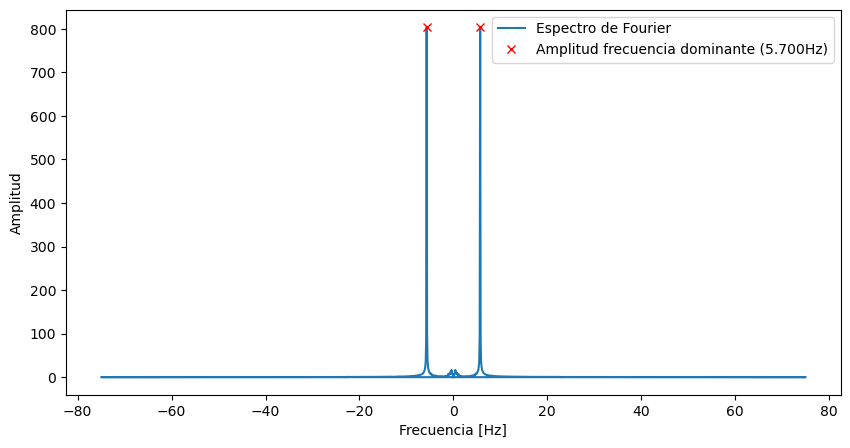

In [75]:
obtener_frecuenciaF(F5,5)
obtener_frecuenciaF(F6,6)



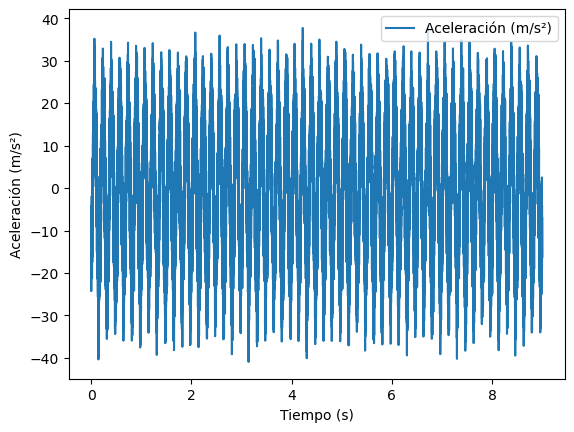

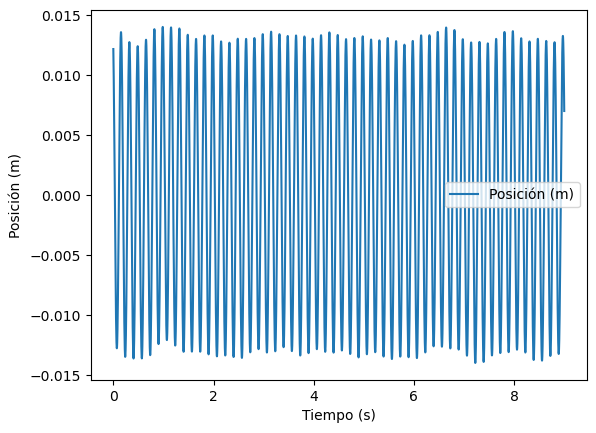

Frecuencia pico: -6.00 Hz, Amplitud: 598.99
Frecuencia pico: 6.00 Hz, Amplitud: 598.99


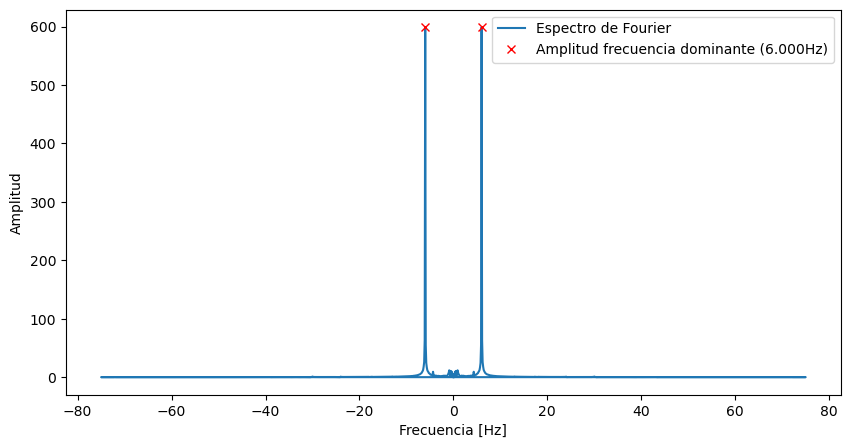

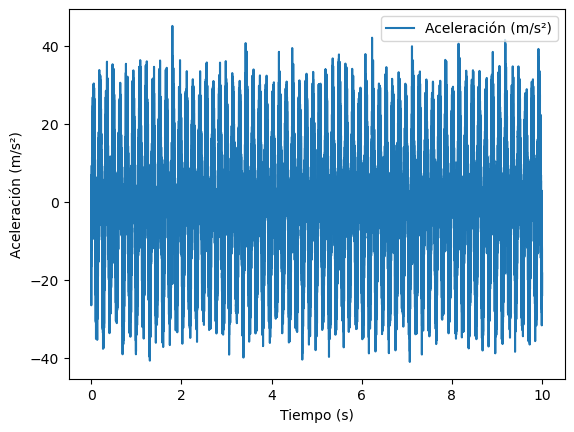

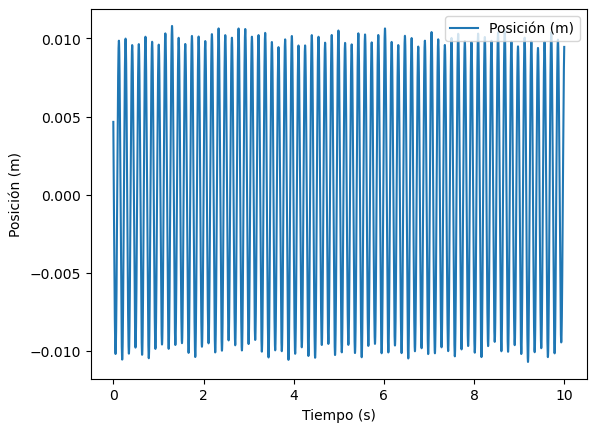

Frecuencia pico: -6.80 Hz, Amplitud: 468.27
Frecuencia pico: 6.80 Hz, Amplitud: 468.27


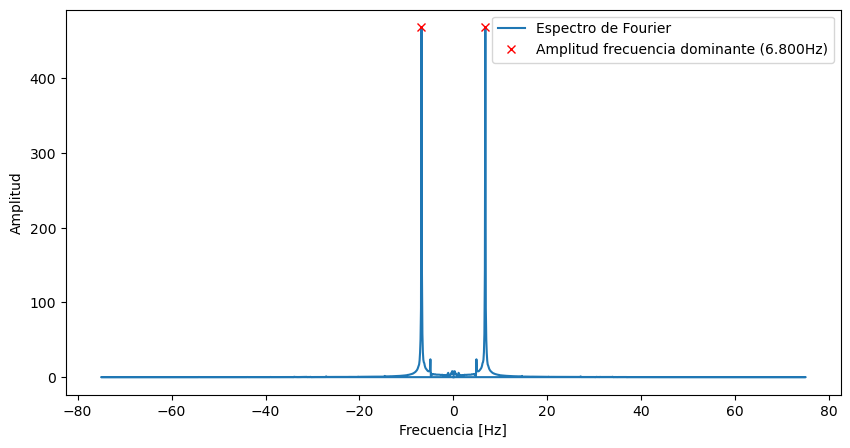

In [76]:
obtener_frecuenciaF(F7,7)
obtener_frecuenciaF(F8,8)

